In [0]:
# pip install qiskit

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# from qiskit import *

In [0]:
# Global Variables describing message and authentication

n = 2
r = 2
s = int(n/r)
len_k = s
len_e = n+s

In [0]:
# ECC for (n + s = 3)

In [0]:
# Classical Error Correction Matrices

# C2 = Dual of hamming code (3->7)
# C2_perp = hamming code (4->7)

G_p = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1]]
H_p = [[0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 0, 1, 0, 1]]
K = [[0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0]]

In [0]:
'''
# C2 = Dual of repetition code (2->3)
# C2_perp = repetition code (1->3)

G_p = [1, 1, 1]
H_p = [[1, 1, 0], [0, 1, 1]]
K = [[0, 1, 1], [0, 0, 1]]
'''

'\n# C2 = Dual of repetition code (2->3)\n# C2_perp = repetition code (1->3)\n\nG_p = [1, 1, 1]\nH_p = [[1, 1, 0], [0, 1, 1]]\nK = [[0, 1, 1], [0, 0, 1]]\n'

In [0]:
def GenKey():
  return np.random.randint(0, 2, len_k), np.random.randint(0, 2, len_e), np.random.randint(0, 2, len(G_p))

In [0]:
def ConvToInt(arr):
  res = int("".join(str(x) for x in arr), 2) 
  return res

In [0]:
k, e, b = GenKey()
print(k)
print(e)
print(b)

[1]
[1 0 1]
[1 1 0 1 0 0 1]


In [0]:
def Send():
  
  def GenMsg():
    return np.random.randint(0, 2, n)
  
  msg = GenMsg()
  print("Actual Message: ", msg)
  
  def MakeMi(message):
    m = []
    for i in range(0,n,s):
      m.append(ConvToInt(message[i:i+s]))
    return m

  def MakeMr():
    m = MakeMi(msg)
    f_k = 0

    for i in range(0,r):
      f_k += m[i]*(ConvToInt(k)**(r-i))

    f_k = f_k%(2**s)
    return (2**s - f_k)%(2**s)

  def MakeMsgToSend():
    msgToSend=msg
    Mr = bin(MakeMr())[2:].zfill(s)
    msgToSend = np.array(np.append(msgToSend, list(Mr)), dtype=int)
    XORed_msg = ConvToInt(msgToSend) ^ ConvToInt(e)
    y = list(bin(XORed_msg)[2:].zfill(len(e)))
    return (np.array(y, dtype=int))

  y = MakeMsgToSend()
  print("Message to be sent (without EC): ", y)
  
  z0 = np.mod(np.matmul(np.transpose(y), K), 2)
  random_choice = np.random.randint(0, 2, 4)
  z = np.mod(z0 + np.matmul(G_p, np.transpose(random_choice)), 2) 
  print("Message to be sent (with EC): ", z)
  
  return z

In [0]:
def Receive(received_msg):
  y_dec = np.mod(np.matmul(H_p, np.transpose(received_msg)), 2)
  print("Received message after EC: ", y_dec)

  XORed_msg_dec = ConvToInt(y_dec) ^ ConvToInt(e)
  Mis_dec = list(bin(XORed_msg_dec)[2:].zfill(len(e)))
  Mis_dec = np.array([int(x) for x in Mis_dec])
  print("Actual message received: ", Mis_dec[:-s])
  return Mis_dec[:-s]

In [0]:
def main():
  sent_message = Send()
  print("Send and Receive the message with bits to be sent in the X basis if the corresponding bit in b is 0, else in the Z basis.")
  received_message = Receive(sent_message) 

if __name__ == "__main__":
    main()


Actual Message:  [0 1]
Message to be sent (without EC):  [1 1 0]
Message to be sent (with EC):  [1 1 1 1 1 0 1]
Send and Receive the message with bits to be sent in the X basis if the corresponding bit in b is 0, else in the Z basis.
Received message after EC:  [1 1 0]
Actual message received:  [0 1]


In [0]:
K_ = 1
N = 3

e = np.arange(0.01, 0.49, 0.01)

In [0]:
x = [K_/N]*len(e)
y = 1 + 2*e*np.log(2*e) + (1-2*e)*np.log(1-2*e)

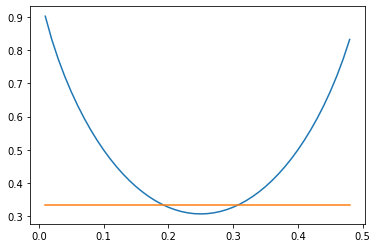

In [0]:
# The x-axis is \eta

plt.plot(e, y) # The y-axis is 1 - h(2\eta), blue graph
plt.plot(e, x) # The orange graph, equal to K'\N

plt.show()

# Code picking
Take $C_1$ and $C_2$ s.t. $C_2^\perp \subset C_1$. 

For $C_i$ we denote $H_i$ the parity check matrix, and $G_i$ the generating matrix. That is, the rows of $G_i$ generate $C_i$ by linear combinations, and we have the property that $H_i . G_i^T = 0_{N-K, K}$ (or $0_{N-K', K'}$ for i = 2).

Now we chose $c_1$ an $N-K$ bit string at random. We encode our message $x$ in a $N$ bit string $y$ chosen at random provided that $y$ belongs to the coset $C_1^{c_1}$ of $C_1$ defined by $c_1$ and to the coset associated to $x$ of $C_1^{c_1}/C_2^\perp$. 

How to do in practice?

The conditions above on $y$ are the following: 

$$H_1.y = c_1$$ and 
$$K_2.y = x$$ 



where $K_2$ is a block matrix such that $G_2 = \left( \frac{H_1}{K_2}\right)$. $G_2$ can always be writen in this way as $C_2^\perp \subset C_1$. [$C_2^\perp$ parity check is $G_2$ and its generating matrix is $H_2$. Since $C_2^\perp \subset C_1$, we have $H_1 . H_2^T = 0_{N-K, N-K'}$ which in turn implies that we can choose the first $N-K$ parity check equations of $C2^\perp$ to be defined by $H_1$. That is the first $N-K$ lines of $G_2$ are $H_1$. The $K'+K-N$ independent remaining ones define $K_2$.]




# Closer to practice
## Preprocessing of the codes


Similarly, the generating matrix of $G_1$ can be chosen so that its first $N-K'$ rows are $H_2$, while the rest $K+K'-N$ lines which defines a submatrix $K_2$ satisfy $H_1 K_2^T = 0$ and $K_1 K_2^T = I$. 

In short, $K_1$ is such that for a codeword of $C_1$ it will determine which coset of $C_2^\perp$ it is associated to. $K_2$ will allow to change coset while staying in $C_1$.

## Encoding
1. We pick $c_1$ a length-$(N-K)$ bit string at random. Then, because $C_1$ can be easily decoded, we find $y_0$ such that $H_1 y_0^T = c_1^T$. 

1. We also compute $y_1$ such that $K_1 (y_0 + y_1) = 0$. This is easily done since $K_1 K_2^T = I$.

1. Now we want to send $x$, a $(K+K'-N)$-bit string. We construct the vector $y_2 = x K_2$.  

1. Then we pick $z$ a $(N-K')$-bit string at random and construct $y_3 = z H_2$. 

Then we form $y = y_0 + y_1 + y_2 + y_3$. 

Here $y_0$ moves to a coset of $C_1$ with syndrome $c_1$. 

$y_1$ stays in the same coset of $C_1$ but moves to the coset of $C_2^\perp$ with all zero syndrome.

$y_2$ picks the coset of $C_2\perp$ associated to the chosen syndrome $x$, which is equivalent to finding a representative of the chosen coset of $C_1/C_2^\perp$.

$y_3$ stays in the same coset of $C_2/C_2^\perp$ but changes representative at random.





